# "Iris" Dataset, Prediction of Optimum Number of Clusters and its Visual Presentation
## **Prediction Using Unsupervised ML**

### **SUNIL SINGH**
*Data Science & Business Analytics Intern*<br> 
*The Spark Foundation*

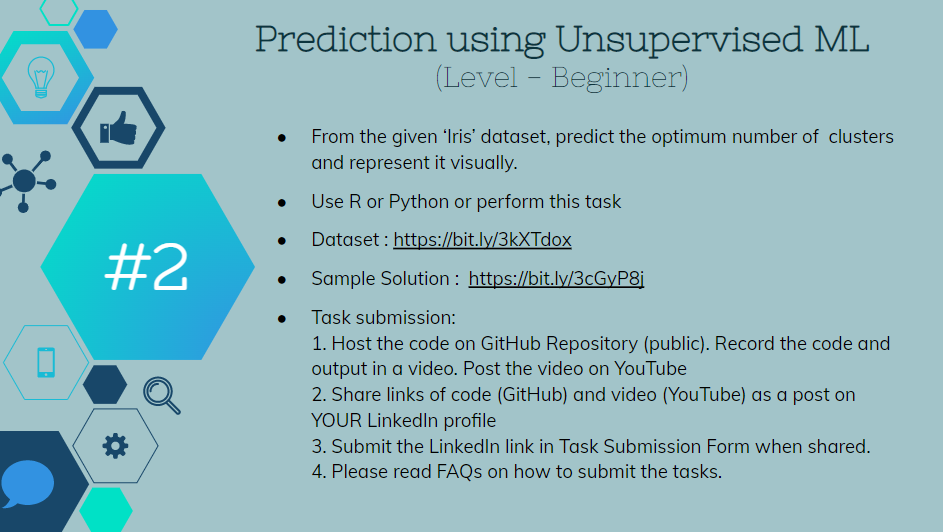

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Special imports
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split

from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/Iris.csv


# Read data from the source

In [2]:
# Reading file from the source as dataset
dataset=pd.read_csv("../input/iris-data/Iris.csv")
Iris=dataset.copy()

# Exploratory Iris Data Analysis (EDA)

In [3]:
#checking dataset columns and first few rows
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Descriptive Data Exploration
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Basic information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Check shape of data
dataset.shape

(150, 6)

In [7]:
# Checking Null Values in Dataset
dataset.isnull==True

False

In [8]:
# Checking total null values in each given variable
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Preparation for finding optimal No. of Clusters  

In [9]:
# Id Column set as a index for this dataset
dataset.set_index('Id', inplace=True)
data=dataset.copy()

In [10]:
# Label Encoding of Categorical Data Type Variable i.e Species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['Species'] = le.fit_transform(dataset['Species'])
print("\nFinal Data")
dataset.head()


Final Data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [11]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2
150,5.9,3.0,5.1,1.8,2


In [12]:
# Checking unique values of Species Variable after Label Encoding
dataset['Species'].unique()

array([0, 1, 2])

In [13]:
# Box Plot of Columns
#for i in cols:
    #dataset.boxplot([i])
    #plt.show()

In [14]:
# Discriptive analysis of Numeric Veriable available in dataset  
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

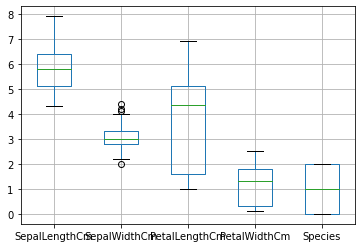

In [15]:
# BoxPlot Visualization of gven data for Outlier Analysis
dataset.boxplot()

> **From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'**

In [16]:
# To remove outliers from 'sepal width (cm)'
q1 = dataset['SepalWidthCm'].quantile(0.25)
q3 = dataset['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
dataset = dataset[(dataset['SepalWidthCm'] >= q1-1.5*iqr) & (dataset['SepalWidthCm'] <= q3+1.5*iqr)]
dataset.shape # To find out the number of rows and column after outlier treatment

(146, 5)

> **We can see that after outlier treatment the number of rows are reduced to 146 from 150**

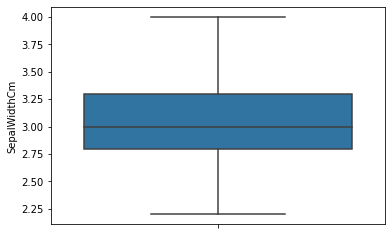

In [17]:
# Boxplot for sepal width (cm) after outlier treatment
sns.boxplot(y=dataset['SepalWidthCm'])
plt.show()

In [18]:
dataset.shape

(146, 5)

In [19]:
# Dropping Categorical data type variable column from Data dataframe
data=data.drop(['Species'],axis=1)

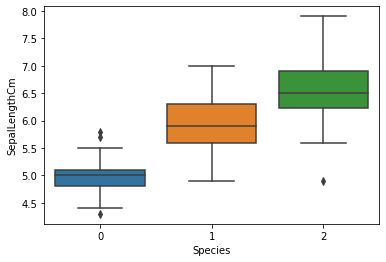

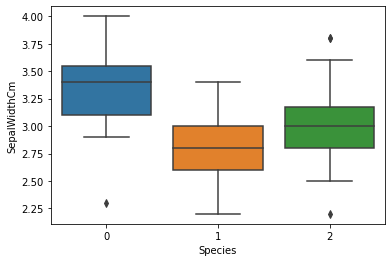

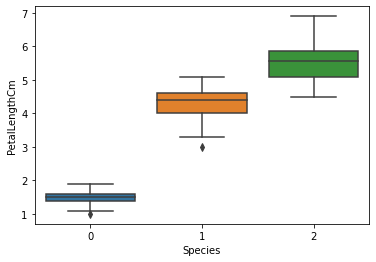

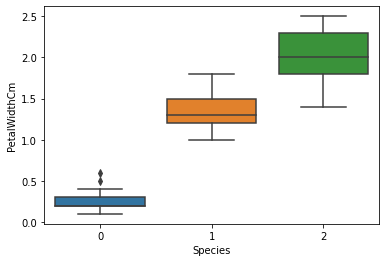

In [20]:
cols=data.columns
for i in cols:
    sns.boxplot(x=dataset['Species'],y=(i), data=data)
    plt.show()

# EDA and Data Visualization

In [21]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.113977,0.879374,0.822577,0.788053
SepalWidthCm,-0.113977,1.000000,-0.397123,-0.329782,-0.397265
PetalLengthCm,0.879374,-0.397123,1.000000,0.961755,0.947469
PetalWidthCm,0.822577,-0.329782,0.961755,1.000000,0.955549
Species,0.788053,-0.397265,0.947469,0.955549,1.000000


<AxesSubplot:>

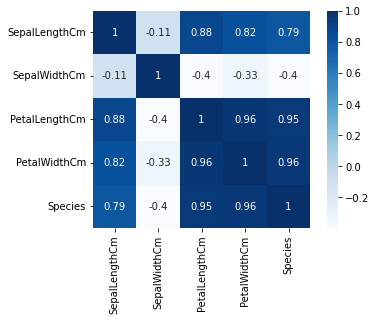

In [22]:
corr=dataset.corr()
sns.heatmap(corr,annot=True, square=True, cmap='Blues')

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>]],
      dtype=object)

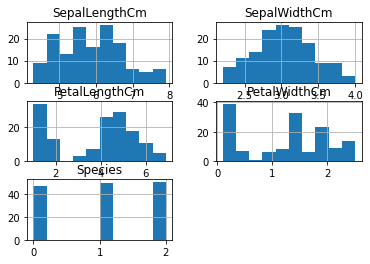

In [23]:
dataset.hist()

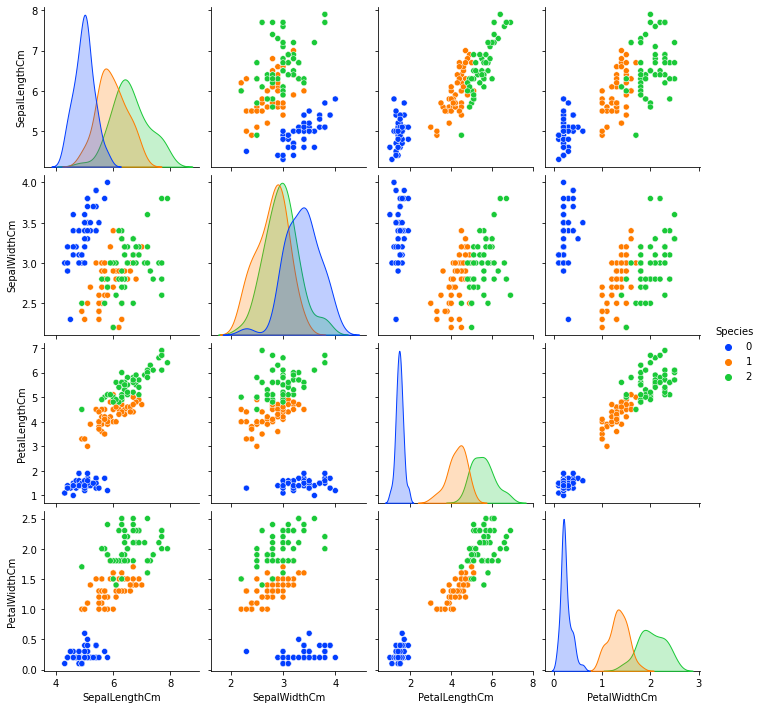

In [24]:
sns.pairplot(dataset, hue="Species", height=2.5, palette='bright')

In [25]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [26]:
data_scaled.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281
149,0.690259,0.350979,0.596665,0.210588


<AxesSubplot:>

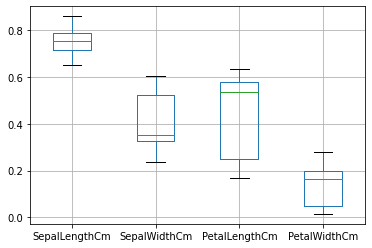

In [27]:
data_scaled.boxplot()

# Prediction of optimal No. of Clusters

# 1. Hierarchical Clustering to determine optimal No. of Clusters
> **Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:**

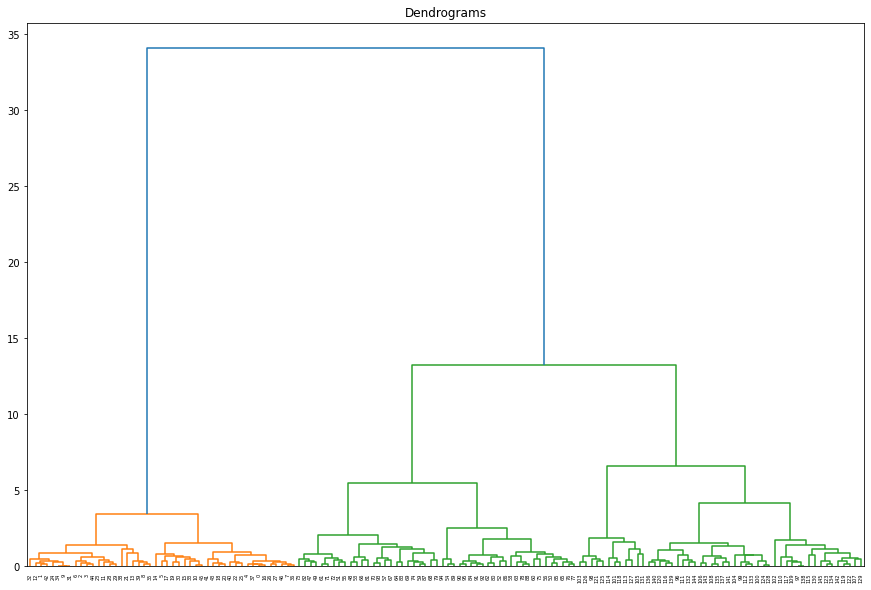

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))

> **The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 1.0 and cut the dendrogram:**

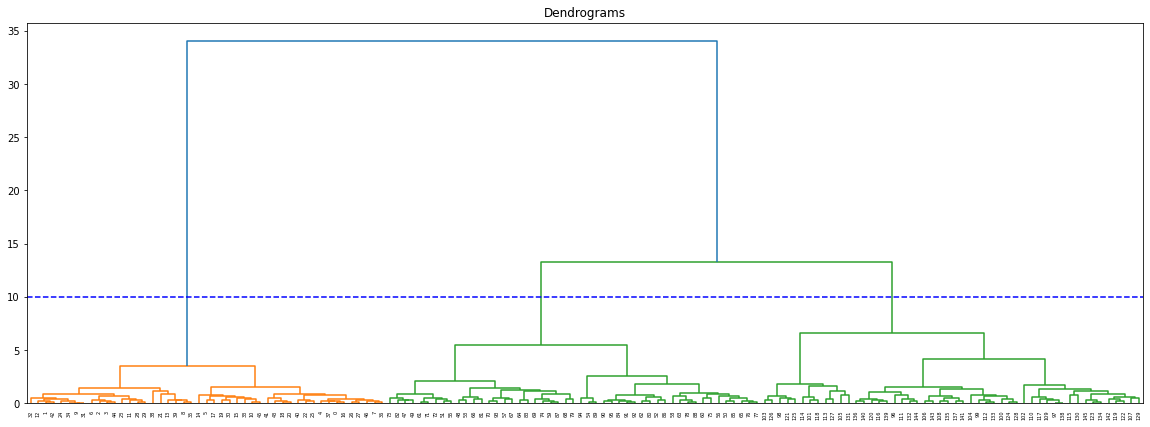

In [29]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))
plt.axhline(y=10, color='b', linestyle='--')

> **We have three clusters as this red line cuts three vertical lines of maximum distance in above dendrogram. Let’s now apply hierarchical clustering for 3 clusters:**

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(dataset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

###  We can see the values of 0s 1s and 2s in the output since we defined 3 clusters. 0 represents the points that belong to the first cluster, 1 represents points in the second cluster, 3 represents points in the third cluster. Let’s now visualize the two clusters:

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

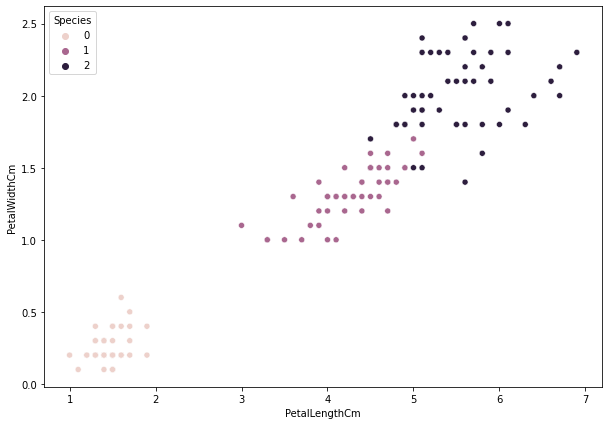

In [31]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(data=dataset, x="PetalLengthCm", y="PetalWidthCm", c=cluster.labels_, hue="Species")


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

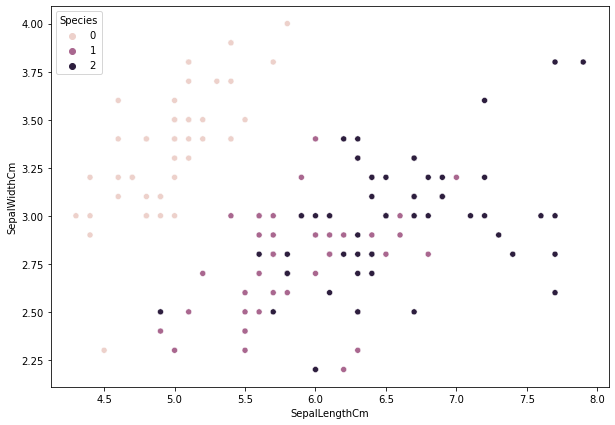

In [32]:
plt.figure(figsize=(10, 7))  
sns.scatterplot(data=dataset, x="SepalLengthCm", y="SepalWidthCm", c=cluster.labels_, hue="Species")

# 2. Determining the optimal value of K (Clusters) in K Means Clustering
## **Using Elbow Method**

In [33]:
# Creating an empty list
cost =[]  # cost = wcss (With in Cluster Sum of Squares)

cl_num = 10 # cl_num is the heighest number of clusters we want to use in Elbow Method, It is completelt arbitary.
for i in range(1, cl_num):  
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(data)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
cost

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.930963049671746,
 34.30776223776224,
 29.88917890442891,
 27.977297315406027]

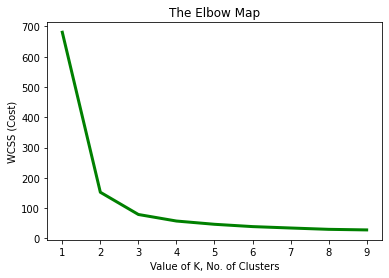

In [34]:
# plot the cost against K values
plt.plot(range(1, cl_num), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K, No. of Clusters")
plt.ylabel("WCSS (Cost)")
plt.title('The Elbow Map')
plt.show() # clear the plot
 
# the point of the elbow is the
# most optimal value for choosing k

**K=1 to K=2 (Steep Slope)**<br>
**K=2 to K=3 (Gentle Slope)**<br>
**K=3 (Elbow Point)**

# Creating a ML Model using K Means Clustering

In [35]:
kmeans=KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [36]:
prediction=kmeans.predict(data)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [37]:
cluster=data.copy()
cluster['Predicted Value']=prediction
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Value
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,0


# Data Presentation of K Means Clustering (ML Model) and Original Iris Data Using Scatter Plot

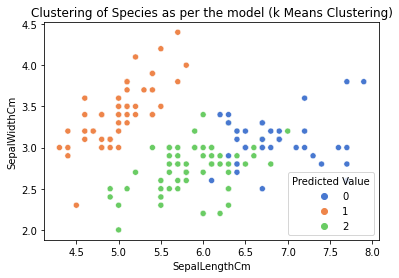

In [38]:
# Sepal Length and Width cluster presentation using scatter plot after K Means Clustering ML Model Prediction
sns.scatterplot(data=cluster, x="SepalLengthCm", y="SepalWidthCm", hue="Predicted Value", palette='muted')
plt.title('Clustering of Species as per the model (k Means Clustering)')
plt.show()

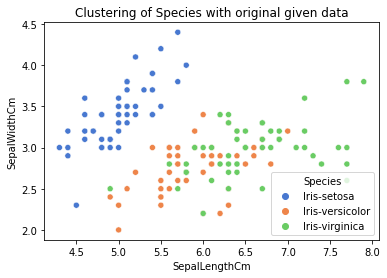

In [39]:
# Sepal Length and Width cluster presentation using scatter plot with real given Iris data 
sns.scatterplot(data=Iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette='muted')
plt.title('Clustering of Species with original given data')
plt.show()

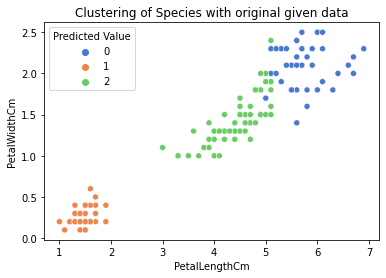

In [40]:
# Similarty for Petals Length and Width
# Petal Length and Width cluster presentation using scatter plot after K Means Clustering ML Model Prediction
sns.scatterplot(data=cluster, x="PetalLengthCm", y="PetalWidthCm", hue="Predicted Value", palette='muted')
plt.title('Clustering of Species with original given data')
plt.show()

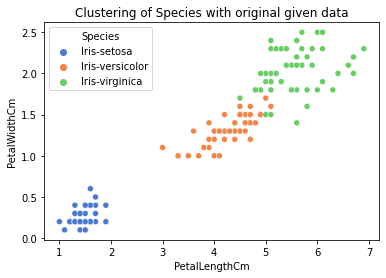

In [41]:
# Petal Length and Width cluster presentation using scatter plot with real given Iris data 
sns.scatterplot(data=Iris, x="PetalLengthCm", y="PetalWidthCm", hue="Species", palette='muted')
plt.title('Clustering of Species with original given data')
plt.show()

# PairPlot Comparision between ML (K Means Clustering) Model Prediction and Iris Real data Species Clustering

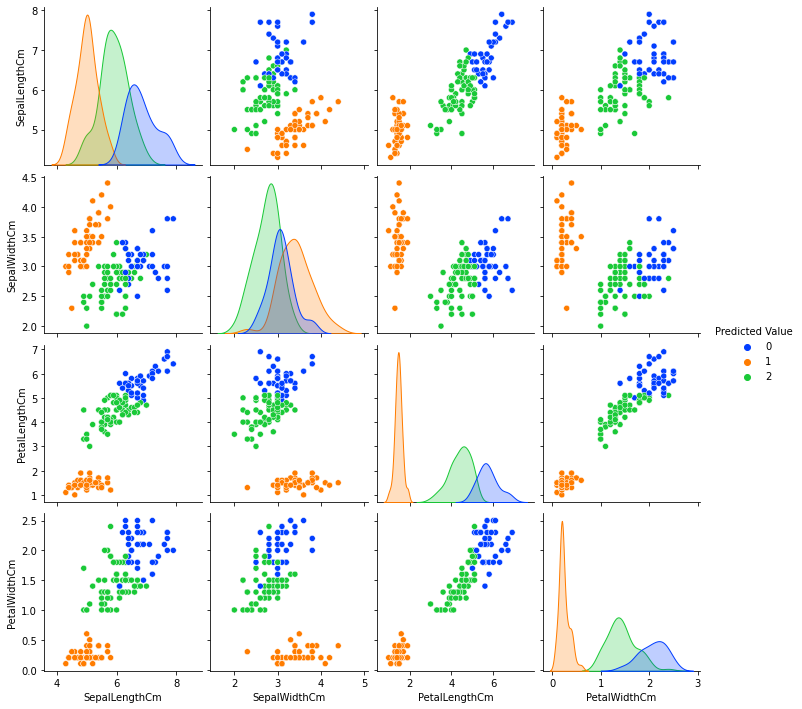

In [42]:
# Pair Plot Comparision between ML (K Means Clustering) Model Prediction and Iris Real data Species Clustering

# Pairplot with ML (K Means Clustering) Model Prediction
sns.pairplot(cluster, hue='Predicted Value', height=2.5, palette='bright')

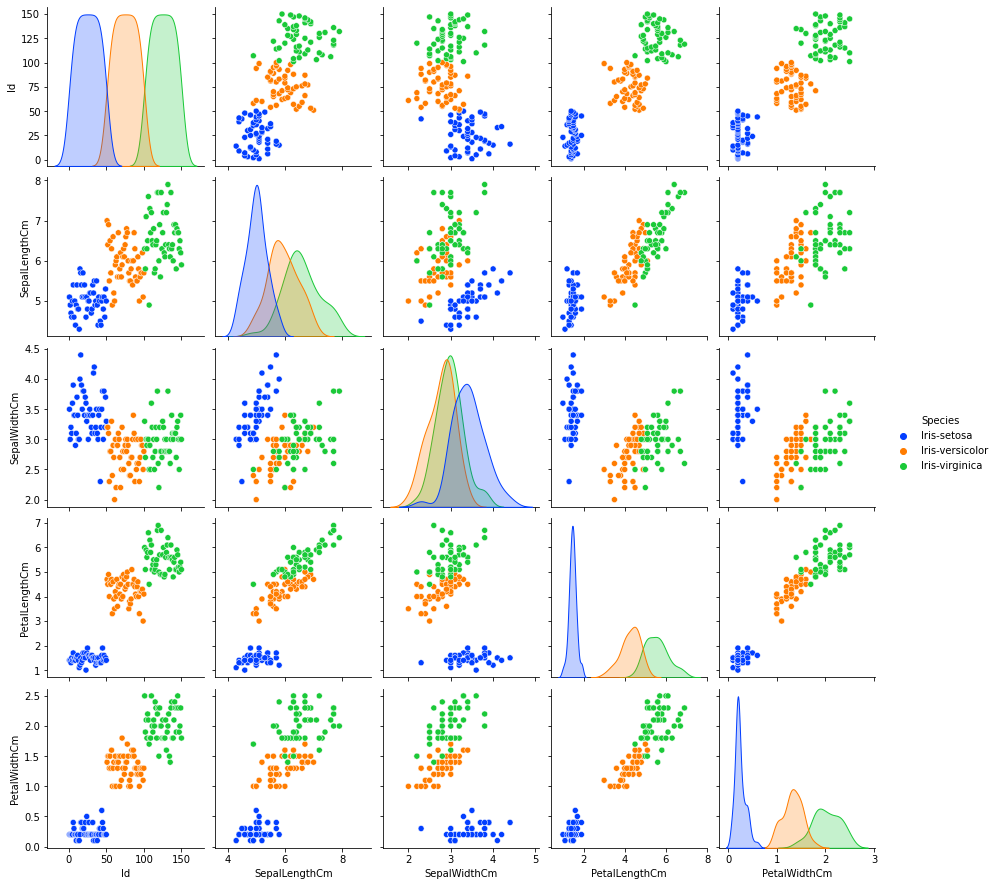

In [43]:
# Pairplot with Iris data Species based clustering
sns.pairplot(Iris, hue='Species', height=2.5, palette='bright')

# Conclusion 

### Using Hierarchical Clustering to determine optimal No. of Clusters and Using Elbow Method to Determine optimal value of K (Clusters) in K Means Clustering, I am able to determine Optimal No. Of clusters (K)=3.
